In [17]:
from tensorflow.keras.models import load_model

model = load_model(
    "cnn_image_classifier.keras",
    compile=False
)
print("Model loaded for inference")

Model loaded for inference


## Prepare Class Labels

In [18]:
class_names = [
    'airplane','automobile','bird','cat','deer',
    'dog','frog','horse','ship','truck'
]

## Load & preprocess image

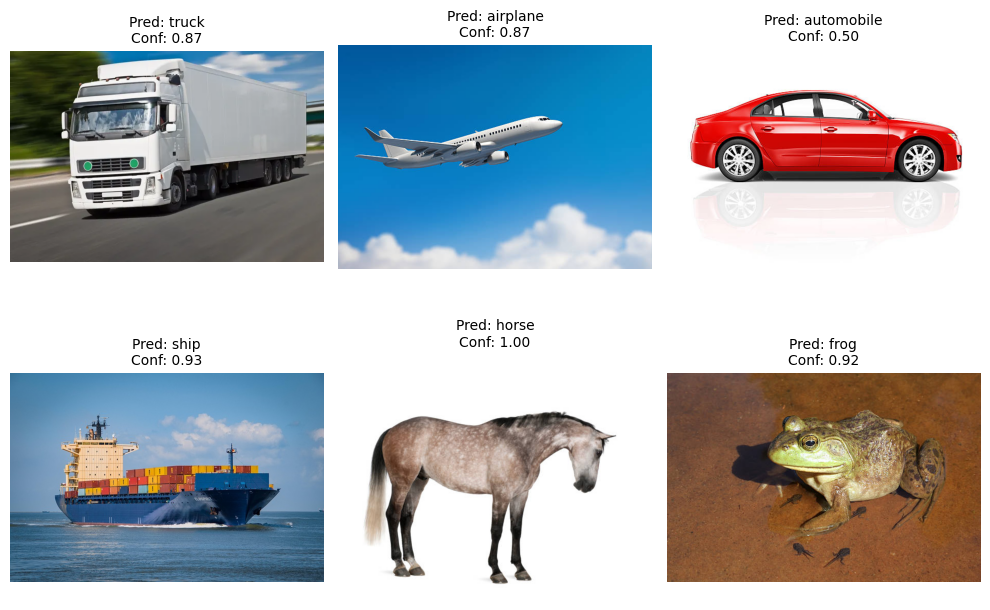

In [30]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

folder = "/content/test_images"
files = os.listdir(folder)

plt.figure(figsize=(10, 10))
img_count = 0

for file in files:
    img_path = os.path.join(folder, file)
    img = cv2.imread(img_path)

    # Skip non-image files
    if img is None:
        continue

    # Convert for display
    display_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Preprocess for model
    img_resized = cv2.resize(display_img, (32, 32))
    img_resized = img_resized / 255.0
    img_resized = np.expand_dims(img_resized, axis=0)

    # Prediction
    pred = model.predict(img_resized, verbose=0)
    predicted_class = class_names[np.argmax(pred)]
    confidence = np.max(pred)

    # Plot
    plt.subplot(3, 3, img_count + 1)
    plt.imshow(display_img)
    plt.title(
        f"Pred: {predicted_class}\nConf: {confidence:.2f}",
        fontsize=10
    )
    plt.axis("off")

    img_count += 1
    if img_count == 9:
        break

plt.tight_layout()
plt.show()
